# Fact-checking



In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import script_dataset3 as sdt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

C:\Users\pc\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading&Extracting the training data

In [2]:
#Data paths
ds1 = './fake_or_real_news.csv'
ds2 = './liar_dataset/train.tsv'
ds3 = './liar_dataset/valid.tsv'
ds4 = './liar_dataset/test.tsv'

#Dataframe1
df_1 = pd.read_csv(ds1)
#df_1 = df_1.sample(50)

y_1 = df_1.label
df_1 = df_1.drop('label', axis=1)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(df_1['text'], y_1, test_size=0.33, random_state=53)

#Dataframe2
df_2 = pd.read_csv(ds2, sep='\t', usecols=[1, 2], names=['label', 'text'])
#df_2 = df_2.sample(50)

df_3 = pd.read_csv(ds3, sep='\t', usecols=[1, 2], names=['label', 'text'])
#df_3 = df_3.sample(50)

df_4 = pd.read_csv(ds4, sep='\t', usecols=[1, 2], names=['label', 'text'])
#df_4 = df_4.sample(50)

y_2_train = df_2.label
X_2_train = df_2.drop('label', axis=1)

y_2_valid = df_3.label
X_2_valid = df_3.drop('label', axis=1)

y_2_test = df_4.label
X_2_test = df_4.drop('label', axis=1)


#Dataframe3
#using the given function below 
X_3_train, X_3_test, y_3_train, y_3_test = sdt.get_dataset3_split(ds1,ds2)


processing datasets
('ds1=', './fake_or_real_news.csv')
('ds2=', './liar_dataset/train.tsv')
-- fake news
Index([u'y', u'claim'], dtype='object')
3171
3164
6335
-- liar liar
Index([u'y', u'claim'], dtype='object')
(set(['false', 'half-true', 'mostly-true', 'pants-fire', 'true', 'barely-true']), 10240)
1676
1995
(set(['true', 'false']), 3671)
false    5159
true     4847
Name: y, dtype: int64
done


## Building Vectorizer Classifier

In [3]:
#For Dataset1
count_vectorizer_1 = CountVectorizer(stop_words='english')
count_train_1 = count_vectorizer_1.fit_transform(X_1_train)
count_test_1 = count_vectorizer_1.transform(X_1_test)

#hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
#hash_train = hash_vectorizer.fit_transform(X_1_train)
#hash_test = hash_vectorizer.transform(X_1_test)

#For Dataset2
count_vectorizer_2 = CountVectorizer(stop_words='english')
count_train_2 = count_vectorizer_2.fit_transform(X_2_train.text)
count_valid_2 = count_vectorizer_2.transform(X_2_valid.text)
count_test_2 = count_vectorizer_2.transform(X_2_test.text)

#For Dataset3
count_vectorizer_3 = CountVectorizer(stop_words='english')
count_train_3 = count_vectorizer_3.fit_transform(X_3_train)
count_test_3 = count_vectorizer_3.transform(X_3_test)


#### Confusion Matrix Plot Function

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Configurations

### Configuration 1

In [5]:
# Model a
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 1), random_state=1)

mlp_classifier.fit(count_train_1, y_1_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

#### Configuration 1.1

accuracy for MLP:   0.997
Confusion matrix, without normalization
accuracy for MLP:   0.997
precision for MLP:   0.995
recall for MLP:   1.000
f1 for MLP:   0.997


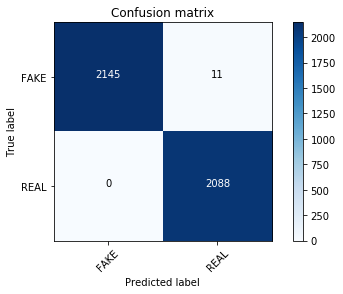

In [6]:
# Model a - train 
mlp_prediction = mlp_classifier.predict(count_train_1)
mlp_score = metrics.accuracy_score(y_1_train, mlp_prediction)
print("accuracy for MLP:   %0.3f" % mlp_score)
cm = metrics.confusion_matrix(y_1_train, mlp_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

mlp_accuracy = metrics.accuracy_score(y_1_train, mlp_prediction)
print("accuracy for MLP:   %0.3f" % mlp_accuracy)

mlp_precision = metrics.precision_score(y_1_train, mlp_prediction, pos_label="REAL")
print("precision for MLP:   %0.3f" % mlp_precision)

mlp_recall = metrics.recall_score(y_1_train, mlp_prediction, pos_label="REAL")
print("recall for MLP:   %0.3f" % mlp_recall)

mlp_f1 = metrics.f1_score(y_1_train, mlp_prediction, pos_label="REAL")
print("f1 for MLP:   %0.3f" % mlp_f1)

#### Configuration 1.2

accuracy for MLP:   0.902
Confusion matrix, without normalization
accuracy for MLP:   0.902
precision for MLP:   0.919
recall for MLP:   0.889
f1 for MLP:   0.904


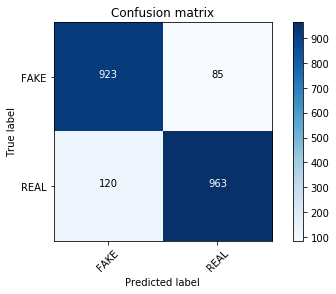

In [7]:
# Model a - test
mlp_prediction = mlp_classifier.predict(count_test_1)
mlp_score = metrics.accuracy_score(y_1_test, mlp_prediction)
print("accuracy for MLP:   %0.3f" % mlp_score)
cm = metrics.confusion_matrix(y_1_test, mlp_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


mlp_accuracy = metrics.accuracy_score(y_1_test, mlp_prediction)
print("accuracy for MLP:   %0.3f" % mlp_accuracy)

mlp_precision = metrics.precision_score(y_1_test, mlp_prediction, pos_label="REAL")
print("precision for MLP:   %0.3f" % mlp_precision)

mlp_recall = metrics.recall_score(y_1_test, mlp_prediction, pos_label="REAL")
print("recall for MLP:   %0.3f" % mlp_recall)

mlp_f1 = metrics.f1_score(y_1_test, mlp_prediction, pos_label="REAL")
print("f1 for MLP:   %0.3f" % mlp_f1)

### K-Fold

In [8]:
cv = ShuffleSplit(n_splits=5, train_size=0.75, random_state=4222)
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, pos_label='REAL')
recall_scorer = make_scorer(recall_score, pos_label='REAL')
f1_scorer = make_scorer(f1_score, pos_label=('REAL'))

count_all = count_vectorizer_1.fit_transform(df_1['text'])

print("accuracies: ", cross_val_score(mlp_classifier, count_all, y_1, cv=cv, scoring=accuracy_scorer))
print("precisions: ", cross_val_score(mlp_classifier, count_all, y_1, cv=cv, scoring=precision_scorer))
print("recalls: ", cross_val_score(mlp_classifier, count_all, y_1, cv=cv, scoring=recall_scorer))
print("f1: ", cross_val_score(mlp_classifier, count_all, y_1, cv=cv, scoring=f1_scorer))

C:\Users\pc\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


('accuracies: ', array([ 0.92113565,  0.91167192,  0.91955836,  0.92902208,  0.91009464]))
('precisions: ', array([ 0.94059406,  0.92176871,  0.93690852,  0.92628205,  0.90410959]))
('recalls: ', array([ 0.89905363,  0.89144737,  0.9054878 ,  0.92926045,  0.90102389]))
('f1: ', array([ 0.91935484,  0.90635452,  0.92093023,  0.92776886,  0.9025641 ]))


In [9]:


#print("Stochastic Gradient Descent is training with CountVectorizer...")
#clf_SGD.fit(count_train, y_train)
#print("SVM is training with CountVectorizer...")
#clf_SVM.fit(count_train, y_train)
#print("Gaussian NB is training with CountVectorizer...")
#clf_GNB.fit(count_train.toarray(), y_train)

### Configuration 2

In [10]:
# Model b
svc_classifier = LinearSVC()
svc_classifier.fit(count_train_2, y_2_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Configuration 2.1

Confusion matrix, without normalization
accuracy for SVC:   0.979
precision for SVC:   0.985
recall for SVC:   0.986
f1 for SVC:   0.985


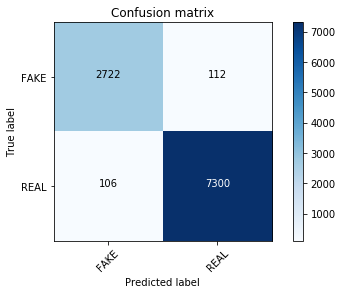

In [11]:
# Model b - train 
y_2_train.loc[y_2_train == 'true'] = 'REAL'
y_2_train.loc[y_2_train == 'mostly-true'] = 'REAL'
y_2_train.loc[y_2_train == 'barely-true'] = 'REAL'
y_2_train.loc[y_2_train == 'half-true'] = 'REAL'
y_2_train.loc[y_2_train == 'false'] = 'FAKE'
y_2_train.loc[y_2_train == 'pants-fire'] = 'FAKE'

svc_prediction = svc_classifier.predict(count_train_2)
for i in range(len(svc_prediction)):     
 if (svc_prediction[i] == 'false' or svc_prediction[i] == 'pants-fire'):
        svc_prediction[i] = 'FAKE'
 elif(svc_prediction[i] == 'true' or svc_prediction[i] == 'half-true'or svc_prediction[i] == 'mostly-true' or svc_prediction[i] == 'barely-true'):
 #else:      
    svc_prediction[i] = 'REAL'     

cm = metrics.confusion_matrix(y_2_train, svc_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

svc_accuracy = metrics.accuracy_score(y_2_train, svc_prediction)
print("accuracy for SVC:   %0.3f" % svc_accuracy)

svc_precision = metrics.precision_score(y_2_train, svc_prediction, pos_label="REAL")
print("precision for SVC:   %0.3f" % svc_precision)

svc_recall = metrics.recall_score(y_2_train, svc_prediction, pos_label="REAL")
print("recall for SVC:   %0.3f" % svc_recall)

svc_f1 = metrics.f1_score(y_2_train, svc_prediction, pos_label="REAL")
print("f1 for SVC:   %0.3f" % svc_f1)

#### Configuration 2.2

accuracy for SVC:   0.627
Confusion matrix, without normalization
accuracy for SVC:   0.627
precision for SVC:   0.732
recall for SVC:   0.743
f1 for SVC:   0.737


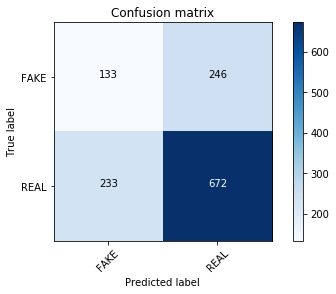

In [12]:
# Model b - valid  
y_2_valid.loc[y_2_valid == 'true'] = 'REAL'
y_2_valid.loc[y_2_valid == 'mostly-true'] = 'REAL'
y_2_valid.loc[y_2_valid == 'barely-true'] = 'REAL'
y_2_valid.loc[y_2_valid == 'half-true'] = 'REAL'
y_2_valid.loc[y_2_valid == 'false'] = 'FAKE'
y_2_valid.loc[y_2_valid == 'pants-fire'] = 'FAKE'


svc_prediction = svc_classifier.predict(count_valid_2)
for i in range(len(svc_prediction)):     
    if (svc_prediction[i] == 'false' or svc_prediction[i] == 'pants-fire'):
        svc_prediction[i] = 'FAKE'
    elif(svc_prediction[i] == 'true' or svc_prediction[i] == 'half-true'or svc_prediction[i] == 'mostly-true' or svc_prediction[i] == 'barely-true'):
        svc_prediction[i] = 'REAL'     

svc_score = metrics.accuracy_score(y_2_valid, svc_prediction)
print("accuracy for SVC:   %0.3f" % svc_score)
cm = metrics.confusion_matrix(y_2_valid, svc_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

svc_accuracy = metrics.accuracy_score(y_2_valid, svc_prediction)
print("accuracy for SVC:   %0.3f" % svc_accuracy)

svc_precision = metrics.precision_score(y_2_valid, svc_prediction, pos_label="REAL")
print("precision for SVC:   %0.3f" % svc_precision)

svc_recall = metrics.recall_score(y_2_valid, svc_prediction, pos_label="REAL")
print("recall for SVC:   %0.3f" % svc_recall)

svc_f1 = metrics.f1_score(y_2_valid, svc_prediction, pos_label="REAL")
print("f1 for SVC:   %0.3f" % svc_f1)

#### Configuration 2.3

accuracy for SVC:   0.648
Confusion matrix, without normalization
accuracy for SVC:   0.648
precision for SVC:   0.765
recall for SVC:   0.747
f1 for SVC:   0.756


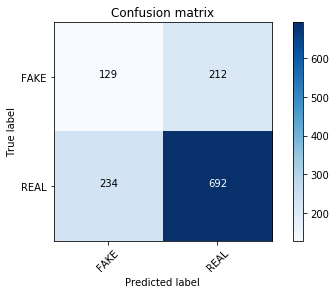

In [13]:
# Model b - test
y_2_test.loc[y_2_test == 'true'] = 'REAL'
y_2_test.loc[y_2_test == 'mostly-true'] = 'REAL'
y_2_test.loc[y_2_test == 'barely-true'] = 'REAL'
y_2_test.loc[y_2_test == 'half-true'] = 'REAL'
y_2_test.loc[y_2_test == 'false'] = 'FAKE'
y_2_test.loc[y_2_test == 'pants-fire'] = 'FAKE'


svc_prediction = svc_classifier.predict(count_test_2)
for i in range(len(svc_prediction)):     
    if (svc_prediction[i] == 'false' or svc_prediction[i] == 'pants-fire'):
        svc_prediction[i] = 'FAKE'
    elif(svc_prediction[i] == 'true' or svc_prediction[i] == 'half-true'or svc_prediction[i] == 'mostly-true' or svc_prediction[i] == 'barely-true'):
        svc_prediction[i] = 'REAL'     

svc_score = metrics.accuracy_score(y_2_test, svc_prediction)
print("accuracy for SVC:   %0.3f" % svc_score)
cm = metrics.confusion_matrix(y_2_test, svc_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

svc_accuracy = metrics.accuracy_score(y_2_test, svc_prediction)
print("accuracy for SVC:   %0.3f" % svc_accuracy)

svc_precision = metrics.precision_score(y_2_test, svc_prediction, pos_label="REAL")
print("precision for SVC:   %0.3f" % svc_precision)

svc_recall = metrics.recall_score(y_2_test, svc_prediction, pos_label="REAL")
print("recall for SVC:   %0.3f" % svc_recall)

svc_f1 = metrics.f1_score(y_2_test, svc_prediction, pos_label="REAL")
print("f1 for SVC:   %0.3f" % svc_f1)

### Configuration 3

#### Configuration 3.1

Confusion matrix, without normalization
accuracy for MLP:   0.646
precision for MLP:   0.761
recall for MLP:   0.752
f1 for MLP:   0.757


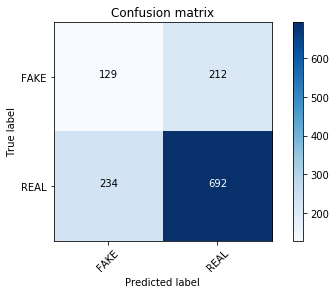

In [14]:
# model a - test - dataset2 
# Model a

mlp_classifier2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 1), random_state=1)
mlp_classifier2.fit(count_train_2, y_2_train)
mlp_prediction = mlp_classifier2.predict(count_test_2)

y_2_test.loc[y_2_test == 'true'] = 'REAL'
y_2_test.loc[y_2_test == 'mostly-true'] = 'REAL'
y_2_test.loc[y_2_test == 'barely-true'] = 'REAL'
y_2_test.loc[y_2_test == 'half-true'] = 'REAL'
y_2_test.loc[y_2_test == 'false'] = 'FAKE'
y_2_test.loc[y_2_test == 'pants-fire'] = 'FAKE'

for i in range(len(mlp_prediction)):     
    if (mlp_prediction[i] == 'false' or mlp_prediction[i] == 'pants-fire'):
        mlp_prediction[i] = 'FAKE'
    elif(mlp_prediction[i] == 'true' or mlp_prediction[i] == 'half-true'or mlp_prediction[i] == 'mostly-true' or mlp_prediction[i] == 'barely-true'):
        mlp_prediction[i] = 'REAL'     

cm = metrics.confusion_matrix(y_2_test, svc_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

mlp_accuracy = metrics.accuracy_score(y_2_test, mlp_prediction)
print("accuracy for MLP:   %0.3f" % mlp_accuracy)

mlp_precision = metrics.precision_score(y_2_test, mlp_prediction, pos_label="REAL")
print("precision for MLP:   %0.3f" % mlp_precision)

mlp_recall = metrics.recall_score(y_2_test, mlp_prediction, pos_label="REAL")
print("recall for MLP:   %0.3f" % mlp_recall)

mlp_f1 = metrics.f1_score(y_2_test, mlp_prediction, pos_label="REAL")
print("f1 for MLP:   %0.3f" % mlp_f1)

#### Configuration 3.2

accuracy for SVC:   0.902
Confusion matrix, without normalization
accuracy for SVC:   0.902
precision for SVC:   0.919
recall for SVC:   0.889
f1 for SVC:   0.904


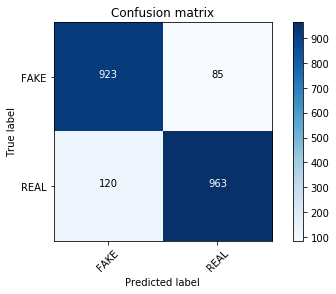

In [15]:
#model b - test - dataset1 

svc_classifier = LinearSVC()
svc_classifier.fit(count_train_1, y_1_train)

svc_prediction = mlp_classifier.predict(count_test_1)

print("accuracy for SVC:   %0.3f" % mlp_score)
cm = metrics.confusion_matrix(y_1_test, svc_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

svc_accuracy = metrics.accuracy_score(y_1_test, svc_prediction)
print("accuracy for SVC:   %0.3f" % svc_accuracy)

svc_precision = metrics.precision_score(y_1_test, svc_prediction, pos_label="REAL")
print("precision for SVC:   %0.3f" % svc_precision)

svc_recall = metrics.recall_score(y_1_test, svc_prediction, pos_label="REAL")
print("recall for SVC:   %0.3f" % svc_recall)

svc_f1 = metrics.f1_score(y_1_test, svc_prediction, pos_label="REAL")
print("f1 for SVC:   %0.3f" % svc_f1)



### Configuration 4

In [16]:
# Model c
nb_classifier = BernoulliNB()
nb_classifier.fit(count_train_3, y_3_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#### Configuration 4.1

accuracy for NB:   0.749
Confusion matrix, without normalization
accuracy for NB:   0.749
precision for NB:   0.867
recall for NB:   0.563
f1 for NB:   0.683


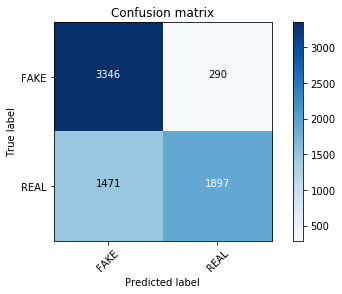

In [17]:
nb_prediction = nb_classifier.predict(count_train_3)

y_3_train.loc[y_3_train == 'true'] = 'REAL'
y_3_train.loc[y_3_train == 'mostly-true'] = 'REAL'
y_3_train.loc[y_3_train == 'barely-true'] = 'REAL'
y_3_train.loc[y_3_train == 'half-true'] = 'REAL'
y_3_train.loc[y_3_train == 'false'] = 'FAKE'
y_3_train.loc[y_3_train == 'pants-fire'] = 'FAKE'


for i in range(len(nb_prediction)):     
 if (nb_prediction[i] == 'false' or nb_prediction[i] == 'pants-fire'):
        nb_prediction[i] = 'FAKE'
 elif(nb_prediction[i] == 'true' or nb_prediction[i] == 'half-true'or nb_prediction[i] == 'mostly-true' or nb_prediction[i] == 'barely-true'):
 #else:      
    nb_prediction[i] = 'REAL'     


nb_score = metrics.accuracy_score(y_3_train, nb_prediction)
print("accuracy for NB:   %0.3f" % nb_score)


cm = metrics.confusion_matrix(y_3_train, nb_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

nb_accuracy = metrics.accuracy_score(y_3_train, nb_prediction)
print("accuracy for NB:   %0.3f" % nb_accuracy)

nb_precision = metrics.precision_score(y_3_train, nb_prediction, pos_label="REAL")
print("precision for NB:   %0.3f" % nb_precision)

nb_recall = metrics.recall_score(y_3_train, nb_prediction, pos_label="REAL")
print("recall for NB:   %0.3f" % nb_recall)

nb_f1 = metrics.f1_score(y_3_train, nb_prediction, pos_label="REAL")
print("f1 for NB:   %0.3f" % nb_f1)

#### Configuration 4.2

accuracy for NB:   0.719
Confusion matrix, without normalization
accuracy for NB:   0.719
precision for NB:   0.809
recall for NB:   0.563
f1 for NB:   0.664


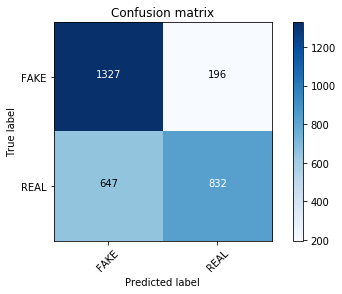

In [18]:
nb_prediction = nb_classifier.predict(count_test_3)

y_3_test.loc[y_3_test == 'true'] = 'REAL'
y_3_test.loc[y_3_test == 'mostly-true'] = 'REAL'
y_3_test.loc[y_3_test == 'barely-true'] = 'REAL'
y_3_test.loc[y_3_test == 'half-true'] = 'REAL'
y_3_test.loc[y_3_test == 'false'] = 'FAKE'
y_3_test.loc[y_3_test == 'pants-fire'] = 'FAKE'


for i in range(len(nb_prediction)):     
 if (nb_prediction[i] == 'false' or nb_prediction[i] == 'pants-fire'):
        nb_prediction[i] = 'FAKE'
 elif(nb_prediction[i] == 'true' or nb_prediction[i] == 'half-true'or nb_prediction[i] == 'mostly-true' or nb_prediction[i] == 'barely-true'):
 #else:      
    nb_prediction[i] = 'REAL'     


nb_score = metrics.accuracy_score(y_3_test, nb_prediction)
print("accuracy for NB:   %0.3f" % nb_score)


cm = metrics.confusion_matrix(y_3_test, nb_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

nb_accuracy = metrics.accuracy_score(y_3_test, nb_prediction)
print("accuracy for NB:   %0.3f" % nb_accuracy)

nb_precision = metrics.precision_score(y_3_test, nb_prediction, pos_label="REAL")
print("precision for NB:   %0.3f" % nb_precision)

nb_recall = metrics.recall_score(y_3_test, nb_prediction, pos_label="REAL")
print("recall for NB:   %0.3f" % nb_recall)

nb_f1 = metrics.f1_score(y_3_test, nb_prediction, pos_label="REAL")
print("f1 for NB:   %0.3f" % nb_f1)

### K-Fold

In [19]:
df_a = np.concatenate((X_3_train, X_3_test), axis = 0)
print(df_a)
df_b = np.concatenate((y_3_train, y_3_test), axis = 0)
df_c = np.append((df_a),(df_b))


cv = ShuffleSplit(n_splits=5, train_size=0.75, random_state=4222)
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, pos_label='REAL')
recall_scorer = make_scorer(recall_score, pos_label='REAL')
f1_scorer = make_scorer(f1_score, pos_label=('REAL'))


count_all = count_vectorizer_1.fit_transform(df_c)

print("accuracies: ", cross_val_score(mlp_classifier, count_all, df_b, cv=cv, scoring=accuracy_scorer))
print("precisions: ", cross_val_score(mlp_classifier, count_all, df_b, cv=cv, scoring=precision_scorer))
print("recalls: ", cross_val_score(mlp_classifier, count_all, df_b, cv=cv, scoring=recall_scorer))
print("f1: ", cross_val_score(mlp_classifier, count_all, df_b, cv=cv, scoring=f1_scorer))

[ 'If we had been on Obamacare and a bureaucrat was trying to tell me when I could get that CAT scan, that would have delayed my treatment.'
 "Clinton clearing primary field for potential 2016 run could leave her vulnerable. Hillary Clinton appears to have scared away much of the competition should she seek the Democratic nomination for president in 2016. But her early and practically all-encompassing effort also presents the potential liability that she will sail through the primary season largely untested for the bare-knuckled general election.\n\nAnd it could deny Democrats the chance to define themselves to Americans, strategists say.\n\n\xe2\x80\x9cIt's not good for a party because the Democratic Party needs a real debate about what it's for, who it's for, what it's about and where we'll take the country,\xe2\x80\x9d says Dennis Kucinich, a former Democratic congressman, presidential candidate and a Fox News contributor.\n\nThe 67-year-old Clinton plans to make an official announc

ValueError: Found input variables with inconsistent numbers of samples: [20012, 10006]